In [2]:
from sklearn import linear_model # импорт модуля с классами линейных моделей

# Linear models

### Ordinary Least Squares

In [3]:
reg = linear_model.LinearRegression() # Linear Regression - это класс, создание объекта (экземпляра) линейной регрессии, в момент создания объекта инициализируются его атрибуты
reg.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2]) # fit() - метод класса (функция), принцип инкапсуляции, не знаем КАК это работает

#метод вычисляет коэффициенты линейной регрессии и сохраняет их в атрибуты объекта reg, возвращается сам объект self для возможности цепочного вызова методов


LinearRegression()

In [4]:
reg.coef_ # атрибуты с подчеркиванием в конце - это параметры, обученные на данных

array([0.5, 0.5])

In [5]:
reg.intercept_

np.float64(1.1102230246251565e-16)

Можно заметить, что признаки идеально мультиколлениарны, второй признак идентичен первому. В таком случае sklearn использует методы псевдообратной матрицы или SVD-разложение.

Даже несмотря на то, что решение может быть получено в таком случае, оно:

а) *численно неустойчиво*

Если совсем немного изменить входные данные, результат может сильно поменяться.

In [6]:
reg1 = linear_model.LinearRegression()
reg1.fit([[0, 0.001], [1, 1], [2, 2]], [0, 1, 2])


LinearRegression()

In [7]:
reg1.coef_

array([1.00000000e+00, 1.62364817e-17])

In [8]:
reg1.intercept_

np.float64(0.0)

Видим, что вектор весов очень сильно поменялся, хотя незначительно поменялось лишь одно входное данное.

б) *неединственность решения*.

В случае идеальной мультиколлениарности существует бесконечно много решений. Разные вектора весов могут давать один и тот же результат. Slkearn в данном случае возвращает одно из решений, с **минимальной** нормой L2.

Для первого случая:

y = 0.5 * x1 + 0.5 * x2;
y = 100 * x1 - 99 * x2

y = 0.5 * 0 + 0.5 * 0 = 0;
y = 100 * 0 - 99 * 0 = 0

y = 0.5 * 1 + 0.5 * 1 = 1;
y = 100 * 1 - 99 * 1 = 1

y = 0.5 * 2 + 0.5 * 2 = 2;
y = 100 * 2 - 99 * 2 = (100 - 99) * 2 = 2

### Ridge regression

In [9]:
rid_reg = linear_model.Ridge(alpha=0.5)
rid_reg.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2])

Ridge(alpha=0.5)

In [10]:
rid_reg.coef_

array([0.44444444, 0.44444444])

In [11]:
rid_reg.intercept_

np.float64(0.11111111111111116)

In [12]:
rid_reg1 = linear_model.Ridge(alpha=0.5)
rid_reg1.fit([[0, 0.001], [1, 1], [2, 2]], [0, 1, 2])

Ridge(alpha=0.5)

In [13]:
rid_reg1.coef_

array([0.44464208, 0.44441961])

In [14]:
rid_reg1.intercept_

np.float64(0.11079017021189563)

Теперь результат более устойчив к изменению входных данных.

## Diabetes example

In [15]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [16]:
X, y = load_diabetes(return_X_y=True)  # загрузка набора данных диабета
X = X[:, [2]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, shuffle=False)  # разбиение на обучающую и тестовую выборки

In [17]:
regression = linear_model.LinearRegression()  
regression.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred = regression.predict(X_test)  # предсказание на тестовой выборке

In [19]:
print(f'MSE: {mean_squared_error(y_test, y_pred):.2f}')
print(f'R2: {r2_score(y_test, y_pred):.2f}')

MSE: 2548.07
R2: 0.47


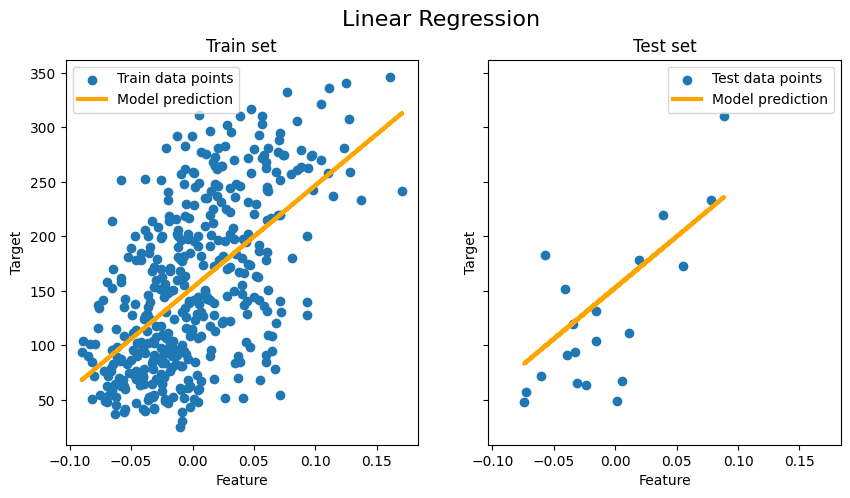

In [20]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 5), sharex=True, sharey=True) 
#создаем объект через фабричный метод, возвращает кортеж из фигуры и осей, фигура - объект класса Figure, оси - объект класса Axes

ax[0].scatter(X_train, y_train, label='Train data points')
ax[0].plot(X_train, regression.predict(X_train), linewidth=3, color='orange', label='Model prediction')
ax[0].set(xlabel='Feature', ylabel='Target', title='Train set')
ax[0].legend()

ax[1].scatter(X_test, y_test, label='Test data points')
ax[1].plot(X_test, y_pred, linewidth=3, color='orange', label='Model prediction')
ax[1].set(xlabel='Feature', ylabel='Target', title='Test set')
ax[1].legend()

fig.suptitle('Linear Regression', fontsize=16)
plt.show()

## OLS and Ridge regression

In [21]:
import numpy as np  

In [22]:
X_train = np.c_[0.5,1].T
y_train = [0.5, 1]
X_test = np.c_[0,2].T

In [23]:
np.random.seed(42)

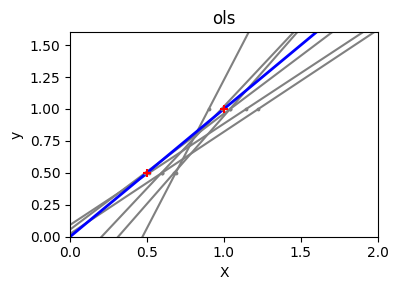

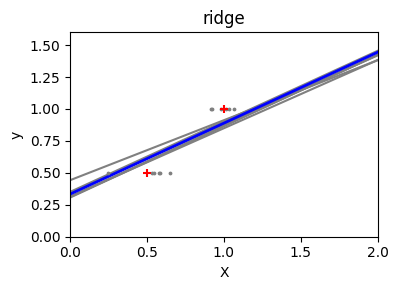

In [24]:
X_train = np.c_[0.5, 1].T
y_train = [0.5, 1]
X_test = np.c_[0, 2].T

np.random.seed(0)

models = dict(
    ols=linear_model.LinearRegression(), ridge=linear_model.Ridge(alpha=0.1)
)

for name, model in models.items():
    fig, ax = plt.subplots(figsize=(4, 3))

    for _ in range(6):
        this_X = 0.1 * np.random.normal(size=(2, 1)) + X_train
        model.fit(this_X, y_train)

        ax.plot(X_test, model.predict(X_test), color="gray")
        ax.scatter(this_X, y_train, s=3, c="gray", marker="o", zorder=10)

    model.fit(X_train, y_train)
    ax.plot(X_test, model.predict(X_test), linewidth=2, color="blue")
    ax.scatter(X_train, y_train, s=30, c="red", marker="+", zorder=10)

    ax.set_title(name)
    ax.set_xlim(0, 2)
    ax.set_ylim((0, 1.6))
    ax.set_xlabel("X")
    ax.set_ylabel("y")

    fig.tight_layout()

plt.show()

### Ridge coefficients

Создадим намеренно плохо обусловленную матрицу, где OLS заведомо будет работать неустойчиво.

In [ ]:
X = 1.0 / (np.arange(1,11) + np.arange(0,10)[:, np.newaxis])
y = np.ones(10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [32]:
n_aphas = 200
alphas = np.logspace(-10, -2, 200)

coefs = []
for alpha in alphas:
    ridge = linear_model.Ridge(alpha=alpha, fit_intercept=False)
    ridge.fit(X,y)
    coefs.append(ridge.coef_)

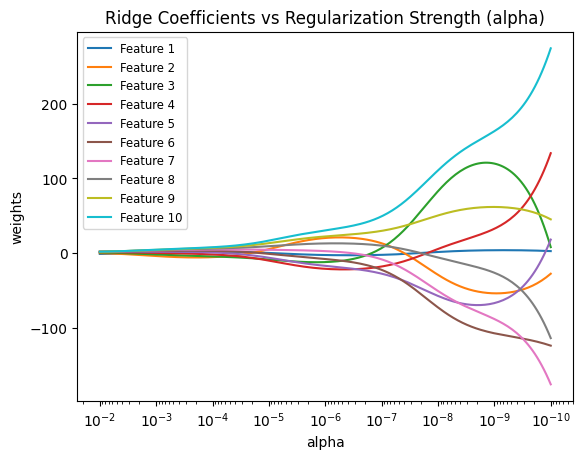

In [40]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.xlabel("alpha")  # Подпись оси X
plt.ylabel("weights")  # Подпись оси Y (значения коэффициентов)
plt.title("Ridge Coefficients vs Regularization Strength (alpha)")
plt.axis("tight")  # Автоматически подбирает границы графика
plt.legend(
    [f"Feature {i + 1}" for i in range(X.shape[1])],  # Названия: Feature 1, Feature 2, ...
    loc="best",  # Автоматически выбирает лучшее место
    fontsize="small"  # Маленький шрифт
)

plt.show()

Видим, что при стремлении альфы к нулю, модель с регуляризацией близка к OLS и также неустойчива, коэффициенты весов большие.

По мере роста альфы веса уменьшаются, если альфа достаточно большое, то веса приближаются к 0. То есть при увеличении "силы" регуляризации, коэффициенты сжимаются. 

Выбирая альфу, по сути, мы находим компромисс между слишком простой моделью и моделью с высокой дисперсией.

RidgeCV() — это Ridge-регрессия со встроенным автоматическим подбором гиперпараметра α (силы регуляризации) через кросс-валидацию. Вместо того чтобы вручную перебирать разные α через GridSearchCV и каждый раз переобучать модель на фолдах, RidgeCV использует математическую оптимизацию: для линейных моделей можно вычислить ошибку leave-one-out (LOO) кросс-валидации по формуле без фактического многократного обучения. Это работает через PRESS-статистику, где LOO-ошибка рассчитывается как сумма квадратов остатков, поделенных на (1 - h_ii), где h_ii — диагональные элементы матрицы шляпы.

In [44]:
reg3 = linear_model.RidgeCV(alphas=np.logspace(-6,6,13))
reg3.fit([[0,0],[0,0],[1,1]], [0, .1, 1])
reg3.alpha_

np.float64(0.01)